# <p style="font-size: 36px;background-color:#000000; color:white; padding:10px 20px; width:95%; border-radius:15px; text-align:center;margin: 0 auto;font-weight: bold;">**BREAD Sales Prediction**</p>

<br>
<br>

<p align="center">
    <img src="Prediction.jpg" alt="GrokRock" width="500" style="border-radius:10px;">
</p>

----------------
## **Context**
----------------

**BREAD as an Inflation Index.**

The price of "The Baguette" in France, along with the purchasing power based on the minimum wage (SMIC), is often compared to assess the country’s economic health. This index provides an estimate of how inflation impacts the population.

In this project, we will create a model to predict bread sales in a bakery over the next six months in order to evaluate the purchasing power of the French.

------------------
## **Objective**
------------------

The price of bread is a **fluctuating mirror of society.** The famous “Baguette Index” (referring to the classic French baguette) compares the evolution of the price of bread with that of the minimum wage in force.

The dataset used here belongs to a French bakery and contains daily transaction details of customers from January 1, 2021, to September 30, 2022. We will build a time series model using AR, MA, ARMA, and ARIMA techniques to predict future sales of French bread (all types) over the next 6 months.

--------------------------
## **Data Dictionary**
--------------------------

- `date`: date order
- `time`: time order
- `ticket number`: identifier for every single transaction
- `article`: name of the product sold (in French)
- `quantity`: quantity sold
- `unit_price`: price per product

## **Importing libraries**

In [1]:
# Installing the appropriate version of statsmodels library
!pip install statsmodels==0.14.2

In [2]:
import statsmodels
statsmodels.__version__

'0.14.2'

In [3]:
# Importing libraries for data manipulation
import pandas as pd

import numpy as np

# Importing libraries for data visualization
import matplotlib.pylab as plt

# Importing an advanced library for data visualization
import seaborn as sns

# Importing library for date manipulation
from datetime import datetime

# To calculate the MSE or RMSE
from sklearn.metrics import mean_squared_error

# Importing acf and pacf functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Importing models from statsmodels library
from statsmodels.tsa.ar_model import AutoReg

from statsmodels.tsa.arima.model import ARIMA

# To ignore the warnings
import warnings
warnings.filterwarnings('ignore')

## **Loading the dataset**

In [4]:
# Loading the dataset
df = pd.read_csv('Bakery sales.csv')

# Looking at first five records of the data
df.head()

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


What products are sold in 'article':

In [5]:
if 'article' in df.columns:
    print(df['article'].unique())
else:
    print("The column 'article' does not exist in the dataframe.")

['BAGUETTE' 'PAIN AU CHOCOLAT' 'PAIN' 'TRADITIONAL BAGUETTE' 'CROISSANT'
 'BANETTE' 'BANETTINE' 'SPECIAL BREAD' 'COUPE' 'SAND JB EMMENTAL'
 'KOUIGN AMANN' 'BOULE 200G' 'BOULE 400G' 'GAL FRANGIPANE 6P' 'CAMPAGNE'
 'MOISSON' 'CAFE OU EAU' 'BRIOCHE' 'CEREAL BAGUETTE' 'SEIGLE' 'COMPLET'
 'DIVERS PATISSERIE' 'GAL FRANGIPANE 4P' 'COOKIE' 'FICELLE'
 'PAIN AUX RAISINS' 'GAL POMME 6P' 'GAL POMME 4P' 'FINANCIER X5'
 'VIK BREAD' 'DIVERS VIENNOISERIE' 'GACHE' 'SANDWICH COMPLET'
 'PAIN BANETTE' 'GRAND FAR BRETON' 'QUIM BREAD' 'SPECIAL BREAD KG'
 'GD KOUIGN AMANN' 'BOULE POLKA' 'DEMI BAGUETTE' 'CHAUSSON AUX POMMES'
 'BAGUETTE GRAINE' 'DIVERS CONFISERIE' 'SUCETTE' 'DIVERS BOULANGERIE'
 'BOISSON 33CL' 'PATES' 'FORMULE SANDWICH' 'DIVERS SANDWICHS'
 'CROISSANT AMANDES' 'PAIN CHOCO AMANDES' 'SACHET VIENNOISERIE' 'NANTAIS'
 'CHOCOLAT' 'PAIN S/SEL' 'FONDANT CHOCOLAT' 'GAL POIRE CHOCO 6P'
 'GAL POIRE CHOCO 4P' 'GALETTE 8 PERS' 'SAND JB' 'SACHET DE CROUTON'
 'GRANDE SUCETTE' 'DEMI PAIN' 'TARTELETTE' 'FLAN' '

BREAD = BAGUETTE, PAIN, TRADITIONAL BAGUETTE, BANETTE, SPECIAL BREAD, BOULE 200G, BOULE 400G, CAMPAGNE, MOISSON, CEREAL BAGUETTE, SEIGLE, COMPLET, FICELLE, VIK BREAD, PAIN BANETTE, SPECIAL BREAD KG, BOULE POLKA, DEMI BAGUETTE, BAGUETTE GRAINE, DEMI PAIN, BAGUETTE APERO, PAIN DE MIE, PAIN NOIR.

Keep the breads!

In [6]:
bread_articles = [
    "BAGUETTE", "PAIN", "TRADITIONAL BAGUETTE", "BANETTE", "SPECIAL BREAD", "BOULE 200G", "BOULE 400G",
    "CAMPAGNE", "MOISSON", "CEREAL BAGUETTE", "SEIGLE", "COMPLET", "FICELLE", "VIK BREAD", "PAIN BANETTE",
    "SPECIAL BREAD KG", "BOULE POLKA", "DEMI BAGUETTE", "BAGUETTE GRAINE", "DEMI PAIN", "BAGUETTE APERO",
    "PAIN DE MIE", "PAIN NOIR"
]

df_bread = df[df['article'].isin(bread_articles)].copy()

df_bread.head()

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"
5,11,2021-01-02,09:25,150043.0,BAGUETTE,2.0,"0,90 €"
7,15,2021-01-02,09:27,150044.0,BANETTE,1.0,"1,05 €"


In [7]:
pd.Series(df_bread.index).describe()

count    140869.000000
mean     117115.403794
std       67728.848610
min           0.000000
25%       58730.000000
50%      116439.000000
75%      176417.000000
max      234004.000000
dtype: float64

Drop "unnecessary" variables

In [8]:
# Drop only columns that exist in the dataframe
cols_to_drop = [col for col in ['Unnamed: 0', 'time', 'ticket_number', 'article', 'Quantity'] if col in df.columns]
df_bread = df_bread.drop(columns=cols_to_drop)

In [9]:
print(df.shape)
df_bread.head()

(234005, 7)


,date,unit_price
0,2021-01-02,"0,90 €"
3,2021-01-02,"1,15 €"
4,2021-01-02,"1,20 €"
5,2021-01-02,"0,90 €"
7,2021-01-02,"1,05 €"


In [10]:
# Reset the index of df_bread to drop the current index and use default integer index
df_bread = df_bread.reset_index(drop=True)
df_bread.head()

,date,unit_price
0,2021-01-02,"0,90 €"
1,2021-01-02,"1,15 €"
2,2021-01-02,"1,20 €"
3,2021-01-02,"0,90 €"
4,2021-01-02,"1,05 €"


## **Checking the info**

In [11]:
# Method to check the info of the data
df_bread.info()
df_bread.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140869 entries, 0 to 140868
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        140869 non-null  object
 1   unit_price  140869 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB


date          0
unit_price    0
dtype: int64

**Observations:**

- There are **140869 observations and 2 columns** in the data.
- The date column is of object data type and the unit_price too. We must **convert the `date` and `unit_price` column to datetime data type and float.**
- There are **no missing values** in the dataset.

In [12]:
df_bread['date'] = pd.to_datetime(df_bread['date'], format='mixed', dayfirst=True)

In [13]:
print(df_bread['unit_price'])

df_bread['unit_price'].info()


0         0,90 €
1         1,15 €
2         1,20 €
3         0,90 €
4         1,05 €
           ...  
140864    2,00 €
140865    1,30 €
140866    1,20 €
140867    1,30 €
140868    1,30 €
Name: unit_price, Length: 140869, dtype: object
<class 'pandas.core.series.Series'>
RangeIndex: 140869 entries, 0 to 140868
Series name: unit_price
Non-Null Count   Dtype 
--------------   ----- 
140869 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


Here, **we don't need datetime as a column**.

In [14]:
# The index is already set to 'date' in df_bread, so you can just display the head
df_bread.head()

,date,unit_price
0,2021-01-02,"0,90 €"
1,2021-01-02,"1,15 €"
2,2021-01-02,"1,20 €"
3,2021-01-02,"0,90 €"
4,2021-01-02,"1,05 €"


In [15]:
# Ensure 'date' is datetime and set as index before resampling
df_bread = df_bread.set_index('date')

# Convert 'unit_price' to numeric (replace comma and euro sign)
df_bread['unit_price'] = df_bread['unit_price'].str.replace(',', '.').str.replace('€', '').str.strip()
df_bread['unit_price'] = pd.to_numeric(df_bread['unit_price'], errors='coerce')

# Group by month, keeping DatetimeIndex
df_bread_by_month = df_bread.resample('MS').mean()

df_bread_by_month.head()

,unit_price
date,
2021-01-01,1.286925
2021-02-01,1.281407
2021-03-01,1.284177
2021-04-01,1.290415
2021-05-01,1.284370


Now, let's **visualize the time series** to get an idea how about the trend and/or seasonality within the data.

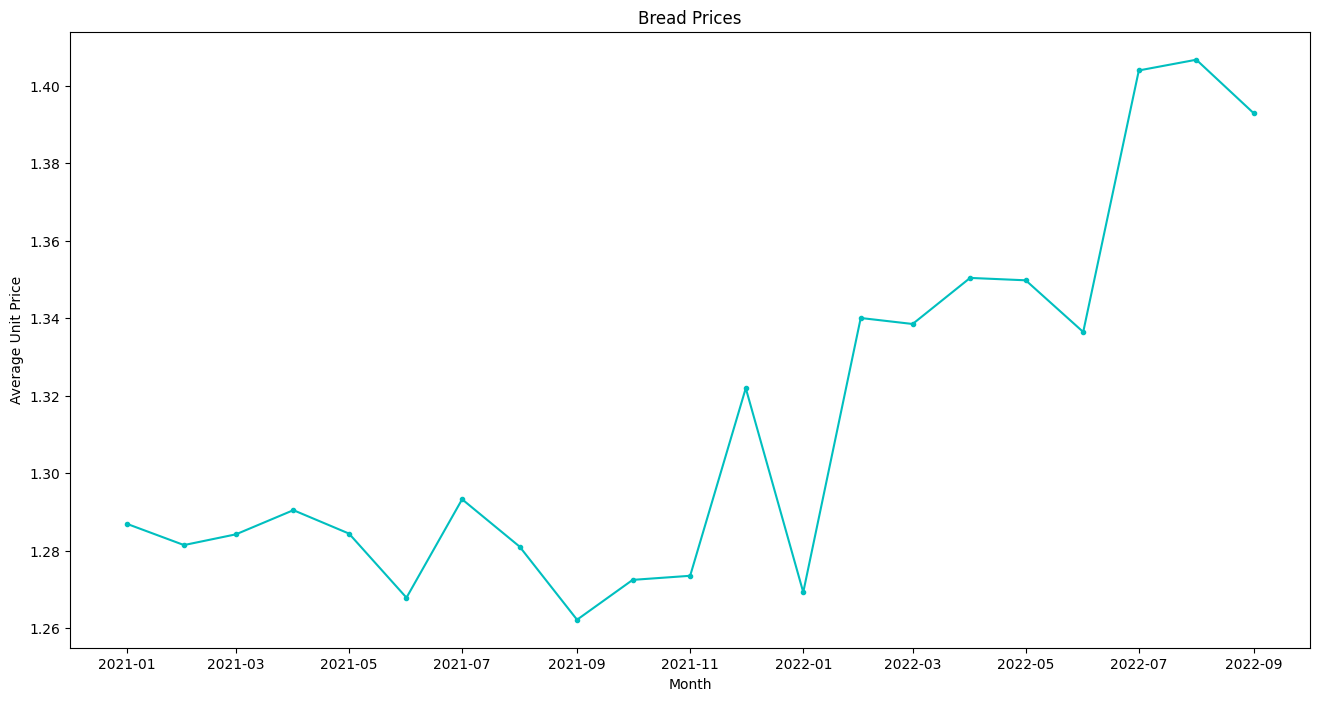

In [16]:
plt.figure(figsize=(16, 8))
plt.xlabel("Month")
plt.ylabel("Average Unit Price")
plt.title('Bread Prices')
plt.plot(df_bread_by_month.index, df_bread_by_month['unit_price'], color='c', marker='.')
plt.show()


**Observations:**

- The series shows an **upward trend with some seasonality.** Sales were relatively low in the first ten months but saw a noticeable increase in early 2022.

 **Bread sales experienced a significantly rise in 2022.**

- Before building the model we must **check whether the series is stationary.**

Now, let’s split the dataset into training and testing sets.

## **Splitting the dataset**

We'll consider the data from the **last 6 months as the test data** and the remaining data as the train data.

In [17]:
# Splitting the data into train and test sets
df_train, df_test = df_bread_by_month.iloc[:-6], df_bread_by_month.iloc[-6:]

print(df_train)

print(df_test)


            unit_price
date                  
2021-01-01    1.286925
2021-02-01    1.281407
2021-03-01    1.284177
2021-04-01    1.290415
2021-05-01    1.284370
2021-06-01    1.267829
2021-07-01    1.293223
2021-08-01    1.281017
2021-09-01    1.262141
2021-10-01    1.272426
2021-11-01    1.273480
2021-12-01    1.321903
2022-01-01    1.269232
2022-02-01    1.340009
2022-03-01    1.338463
            unit_price
date                  
2022-04-01    1.350355
2022-05-01    1.349736
2022-06-01    1.336405
2022-07-01    1.403899
2022-08-01    1.406664
2022-09-01    1.392839


Now, let us check the **rolling mean and standard deviation** of the series to **visualize if the series has any trend or seasonality.**

## **Testing the stationarity of the series**

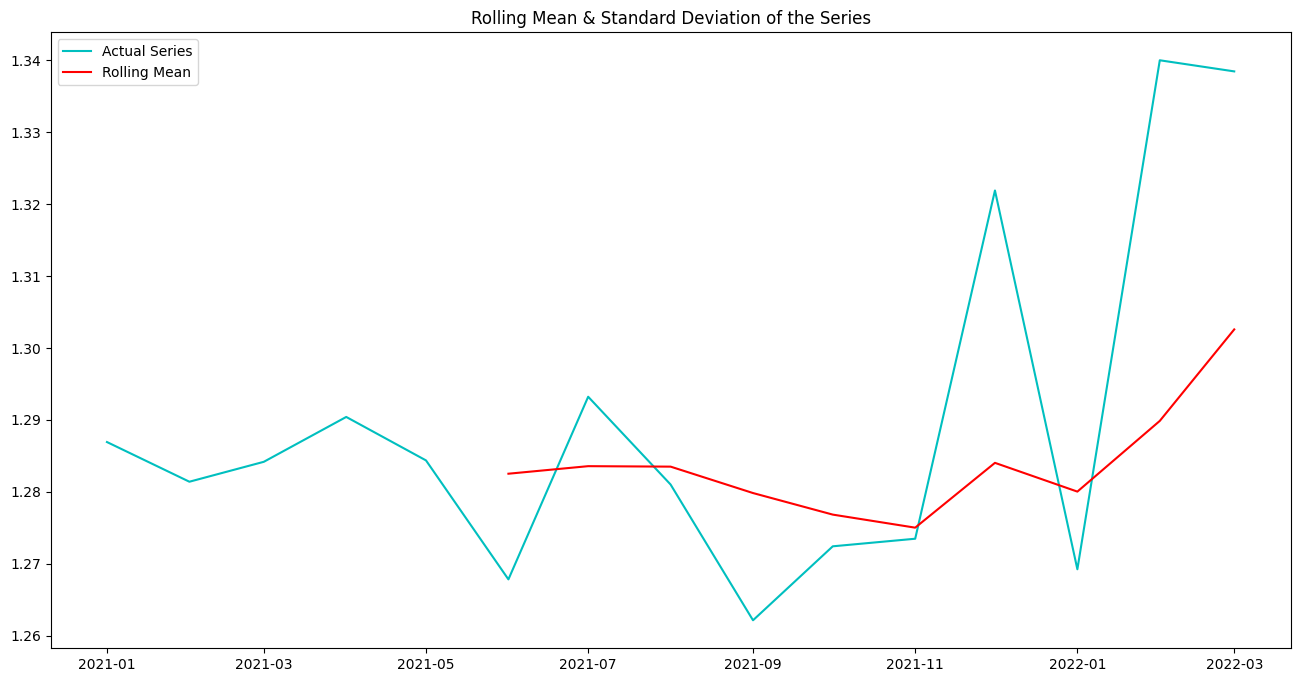

In [18]:
# Calculating the rolling mean and standard deviation for a window of 6 observations
rolmean = df_train.rolling(window = 6).mean()

rolstd = df_train.rolling(window = 6).std()

# Visualizing the rolling mean and standard deviation
plt.figure(figsize = (16, 8))

actual = plt.plot(df_train, color = 'c', label = 'Actual Series')

rollingmean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')

plt.title('Rolling Mean & Standard Deviation of the Series')

plt.legend()

plt.show()

**Observations:**
- We can see that **there is an upward trend in the series.**
- We can confirm that **the series is not stationary.**

We will use the **Augmented Dickey-Fuller (ADF) Test** to verify if the series is stationary or not.
The null and alternate hypotheses for the ADF Test are defined as:
- **Null hypothesis:** The Time Series is non-stationary
- **Alternative hypothesis:** The Time Series is stationary

In [19]:
# Define a function to use adfuller test
def adfuller(data):

  #Importing adfuller using statsmodels
    from statsmodels.tsa.stattools import adfuller

    print('Dickey-Fuller Test: ')

    adftest = adfuller(data['unit_price'], autolag='AIC')

    adfoutput = pd.Series(adftest[0:4], index = ['Test Statistic', 'p-value', 'Lags Used', 'No. of Observations'])

    for key, value in adftest[4].items():
        adfoutput['Critical Value (%s)'%key] = value
    print(adfoutput)


adfuller(df_train)

Dickey-Fuller Test: 
Test Statistic         -2.186805
p-value                 0.211069
Lags Used               5.000000
No. of Observations     9.000000
Critical Value (1%)    -4.473135
Critical Value (5%)    -3.289881
Critical Value (10%)   -2.772382
dtype: float64


**Observations:**
1. From the above test, we can see that the **p-value is around 0.21, i.e., > 0.05** (for 95% confidence intervals) therefore, **we fail to reject the null hypothesis.**
2. Hence, **we can confirm that the series is non-stationary.**

## **Making the series stationary**

Methods to convert a non-stationary series into a stationary one:
1. **Log Transformation**
2. **By differencing the series (lagged series)**

1/ log transformation over this series to remove exponential variance and check the stationarity of the series again.

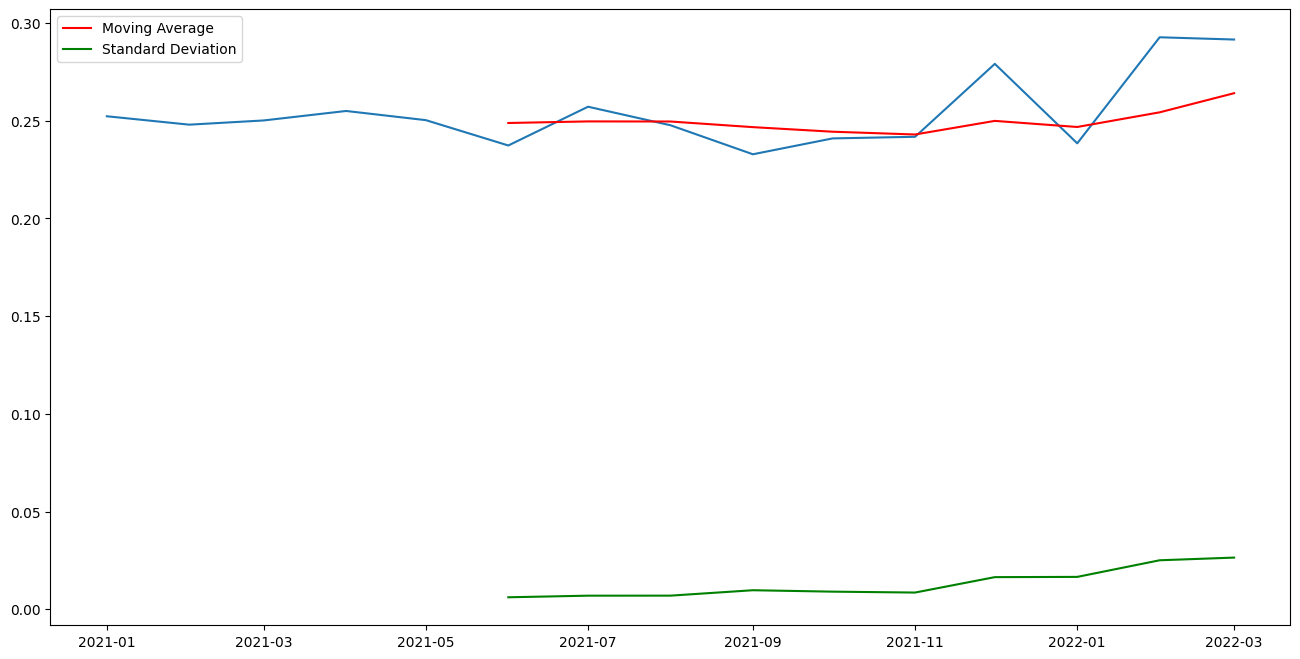

In [20]:
# Visualize the rolling mean and standard deviation after using log transformation
plt.figure(figsize = (16, 8))

df_log = np.log(df_train)

MAvg = df_log.rolling(window = 6).mean()

MStd = df_log.rolling(window = 6).std()

plt.plot(df_log)

plt.plot(MAvg, color='r', label = 'Moving Average')

plt.plot(MStd, color='g', label = 'Standard Deviation')

plt.legend()

plt.show()

**Observations:**
- **we can still see the upward trend in the series in December**, **the series is still non-stationary.**
- However, the standard deviation is almost constant, which implies that **now the series has a constant variance.**

**Let's shift the series by order 1 (or by 1 month) and apply differencing (using lagged series),** and then check the rolling mean and standard deviation.

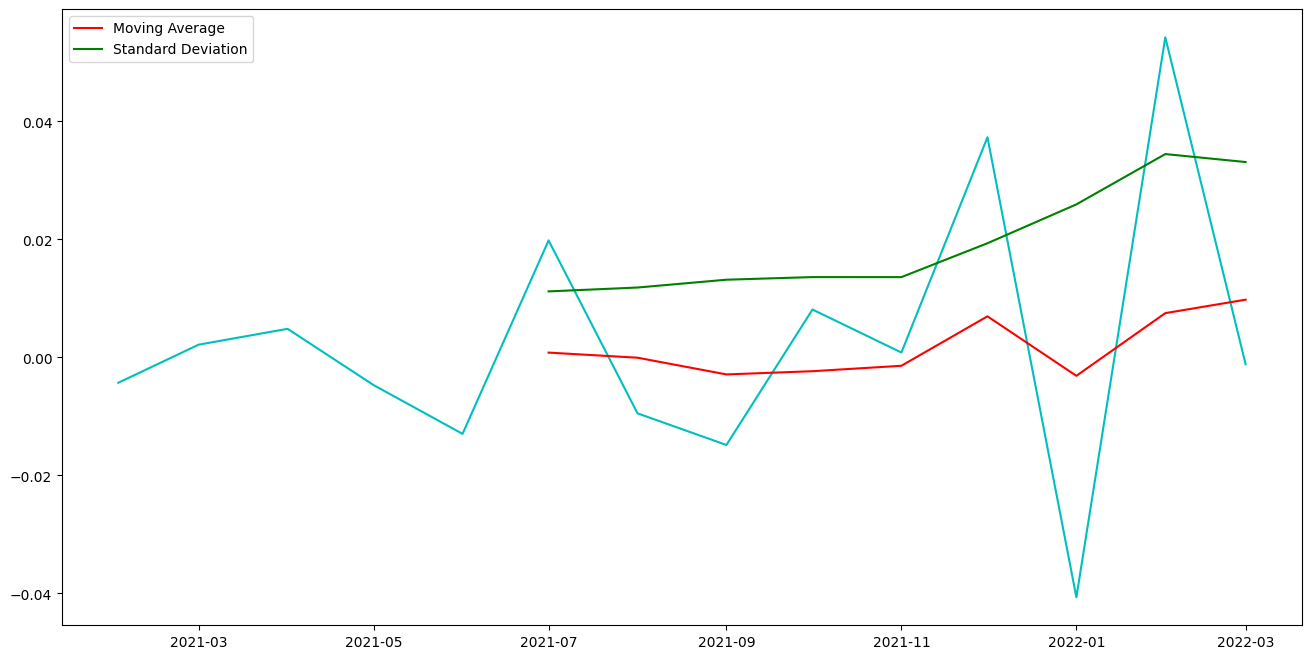

In [21]:
# Fixing the figure size
plt.figure(figsize = (16, 8))

df_shift = df_log - df_log.shift(periods = 1)

MAvg_shift = df_shift.rolling(window = 6).mean()

MStd_shift = df_shift.rolling(window = 6).std()

plt.plot(df_shift, color = 'c')

plt.plot(MAvg_shift, color = 'red', label = 'Moving Average')

plt.plot(MStd_shift, color = 'green', label = 'Standard Deviation')

plt.legend()

plt.show()

# Dropping the null values that we get after applying differencing method
df_shift = df_shift.dropna()

**Observations:**
- **The mean and the standard deviation seem to be constant over time, with some fluctuations** The Dickey_Fuller Test will check the stationarity.

In [22]:
adfuller(df_shift)

Dickey-Fuller Test: 
Test Statistic         -1.764988e+01
p-value                 3.724533e-30
Lags Used               5.000000e+00
No. of Observations     8.000000e+00
Critical Value (1%)    -4.665186e+00
Critical Value (5%)    -3.367187e+00
Critical Value (10%)   -2.802961e+00
dtype: float64


**Observations:**
- **The p-value is now far lesser than 0.05** (for 95% confidence interval), **therefore, we can reject the null hypothesis that the series is non-stationary.**

Conclusion: **the series is now stationary.** Let's decompose the time series to check its different components.

## **Decomposing the time series components into Trend, Seasonality, and Residual**

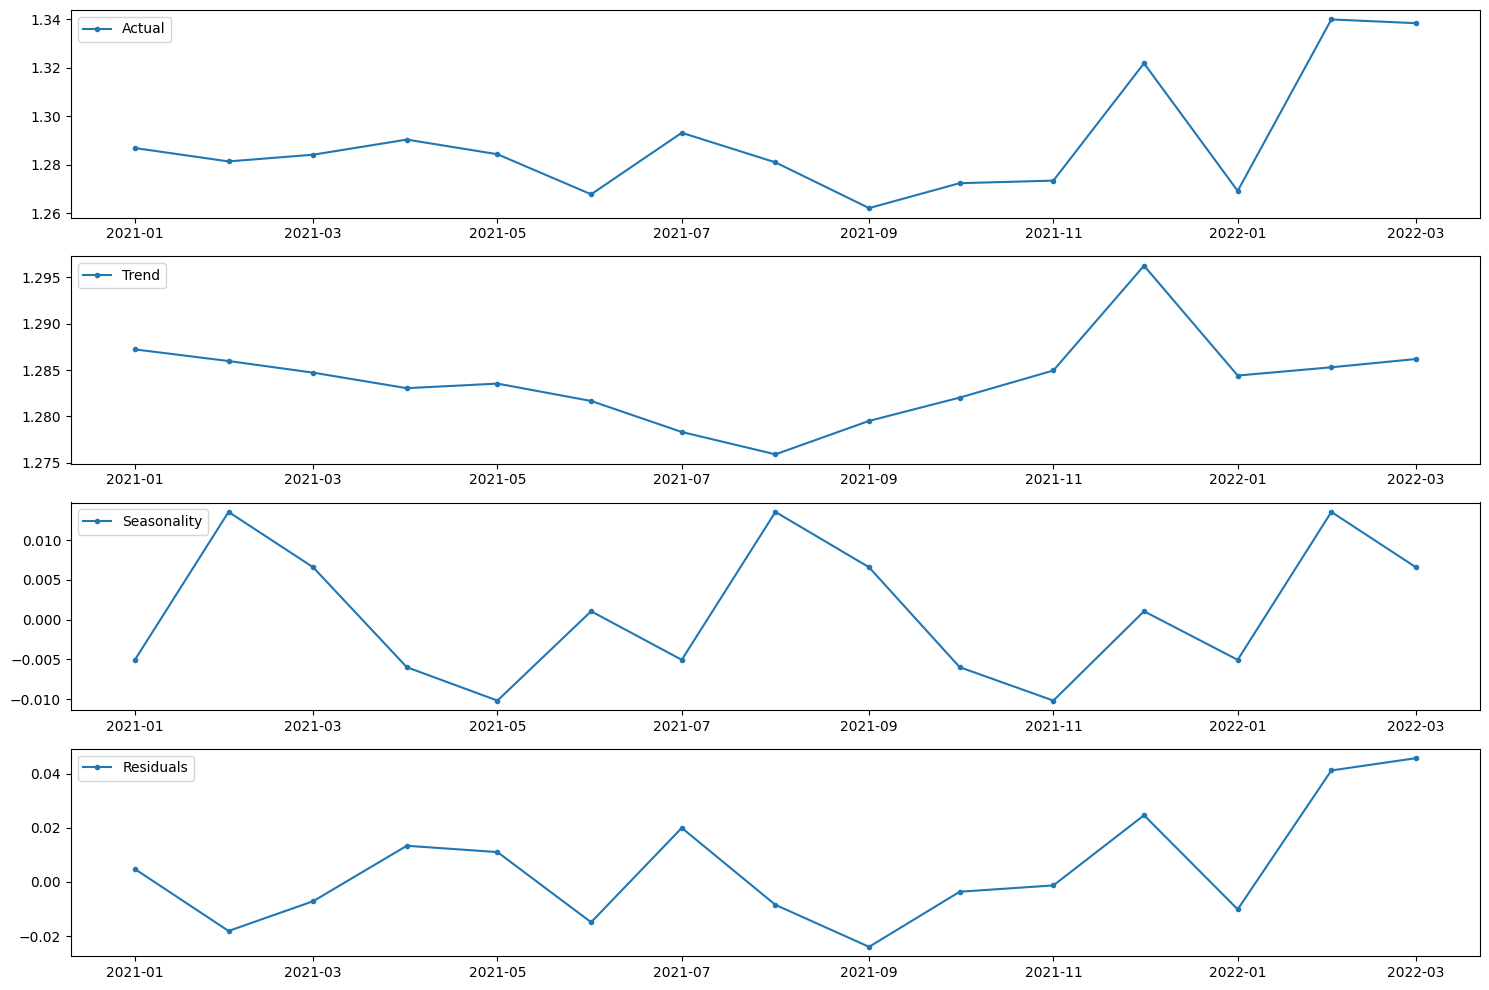

In [23]:
# Importing the seasonal_decompose to decompose the time series
from statsmodels.tsa.seasonal import seasonal_decompose

# The seasonal_decompose function requires at least 2 full cycles of data (24 observations for monthly data).
# Since df_train only has 15 observations, set the period manually and use extrapolate_trend to avoid errors.
decomp = seasonal_decompose(df_train, model='additive', period=6, extrapolate_trend='freq')

trend = decomp.trend

seasonal = decomp.seasonal

residual = decomp.resid

plt.figure(figsize = (15, 10))

plt.subplot(411)

plt.plot(df_train, label = 'Actual', marker = '.')

plt.legend(loc = 'upper left')

plt.subplot(412)

plt.plot(trend, label = 'Trend', marker = '.')

plt.legend(loc = 'upper left')

plt.subplot(413)

plt.plot(seasonal, label = 'Seasonality', marker = '.')

plt.legend(loc = 'upper left')

plt.subplot(414)

plt.plot(residual, label = 'Residuals', marker = '.')

plt.legend(loc = 'upper left')

plt.tight_layout()

**Observations:**
- We can observe significant **trend, seasonality, and residuals components** in the series.
- The plot for seasonality highlights the **Bread sales peak in December and followed by a fall in January 2022 .**

**Now, let's build the models. We will plot the `ACF` and `PACF` to get the values of p and q, the order of AR and MA models.**

## **ACF and PACF plots**

**Plotting the auto-correlation function and partial auto-correlation function to get p and q values for AR, MA, ARMA, and ARIMA models.**

<Figure size 1600x800 with 0 Axes>

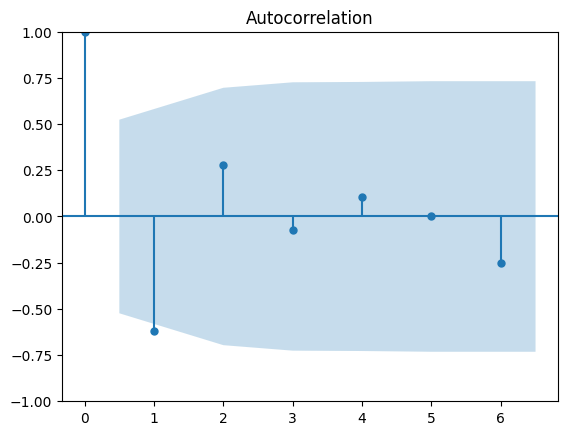

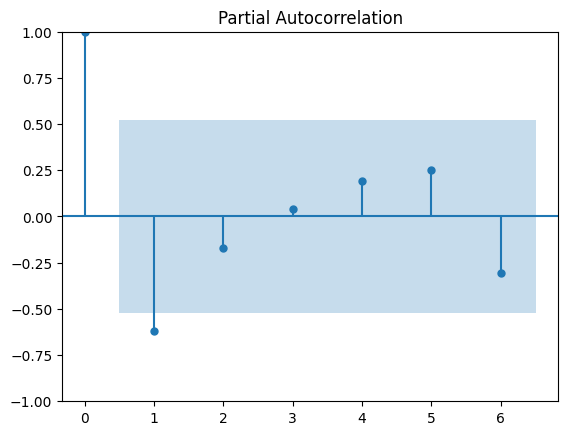

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize = (16, 8))

plot_acf(df_shift, lags = 6)

plt.show()

plot_pacf(df_shift, lags = 6)

plt.show()

**Observations:**
- From the above PACF plot, we observe that **the highest lag** at which the plot extends beyond the statistically significant boundary is **lag 1.**
- This indicates that an **AR Model of lag 1 (p = 1)** should be sufficient to fit the data.
- Similarly, from the ACF plot, we can infer that **q = 1.**

## **AR Model**

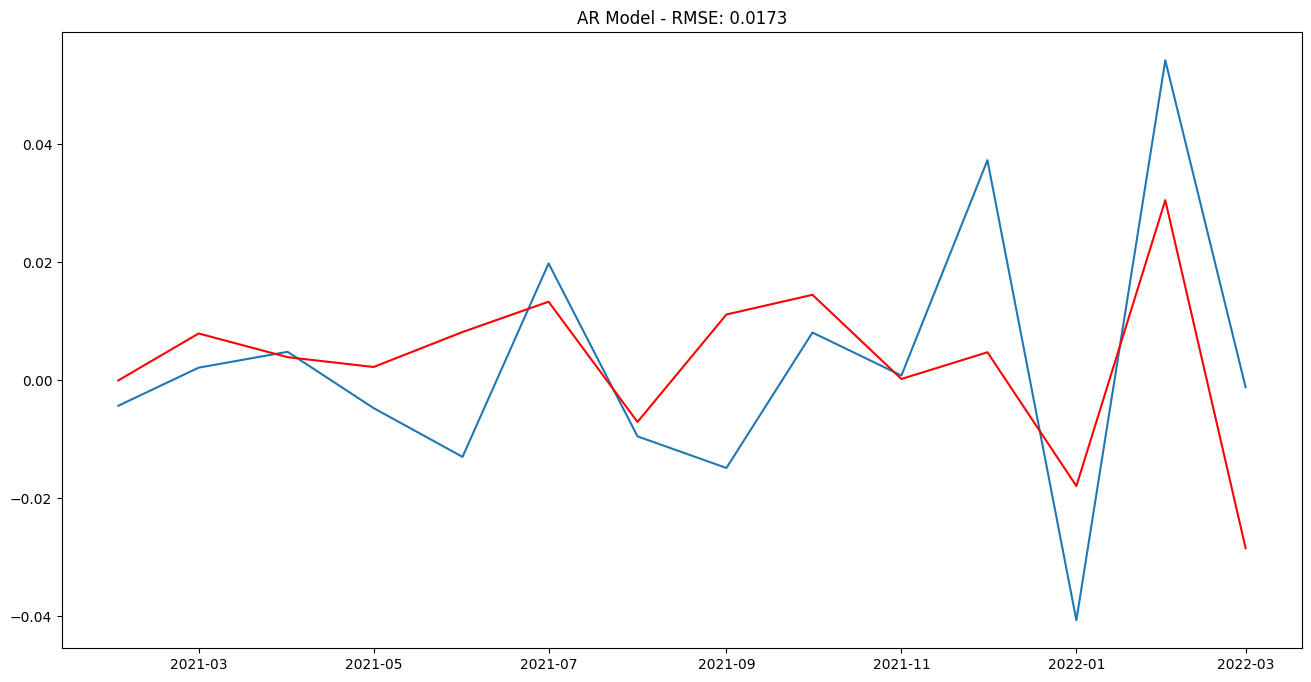

In [25]:
# Importing AutoReg function to apply AR model
from statsmodels.tsa.ar_model import AutoReg

plt.figure(figsize = (16, 8))

# Using number of lags as 1
model_AR = AutoReg(df_shift, lags = 1)

results_AR = model_AR.fit()

plt.plot(df_shift)

predict = results_AR.predict(start = 0, end = len(df_shift) - 1)

# Converting NaN values to 0
predict = predict.fillna(0)

plt.plot(predict, color = 'red')

# Calculating rmse
rmse = np.sqrt(mean_squared_error(predict, df_shift['unit_price']))
plt.title('AR Model - RMSE: %.4f' % rmse)

plt.show()

- We can see that **by using the AR model, we get root mean squared error (RMSE) = 0.0173**.

**Let's check the AIC value** of the model. 

(Akaike information criterion) AIC=2k−2ln(L) -> k is the number of parameters in the model & ln(L) is the log-likelihood of the model

Compare the AIC value of each model. 

The model with the lowest AIC offers the best fit.


Nethertheless, RMSE is a direct measure of the model's predictive accuracy. 

Lower RMSE indicates better predictive performance, as it measures how much the predictions deviate from the actual values.

In [26]:
# Checking the AIC value
results_AR.aic

np.float64(-61.6548278563275)

Now, let's build MA, ARMA, and ARIMA models and see if we can get a better model.

## **MA Model**

**We will be using an ARIMA model with p = 0 and d = 0 so that it works as an MA model.**

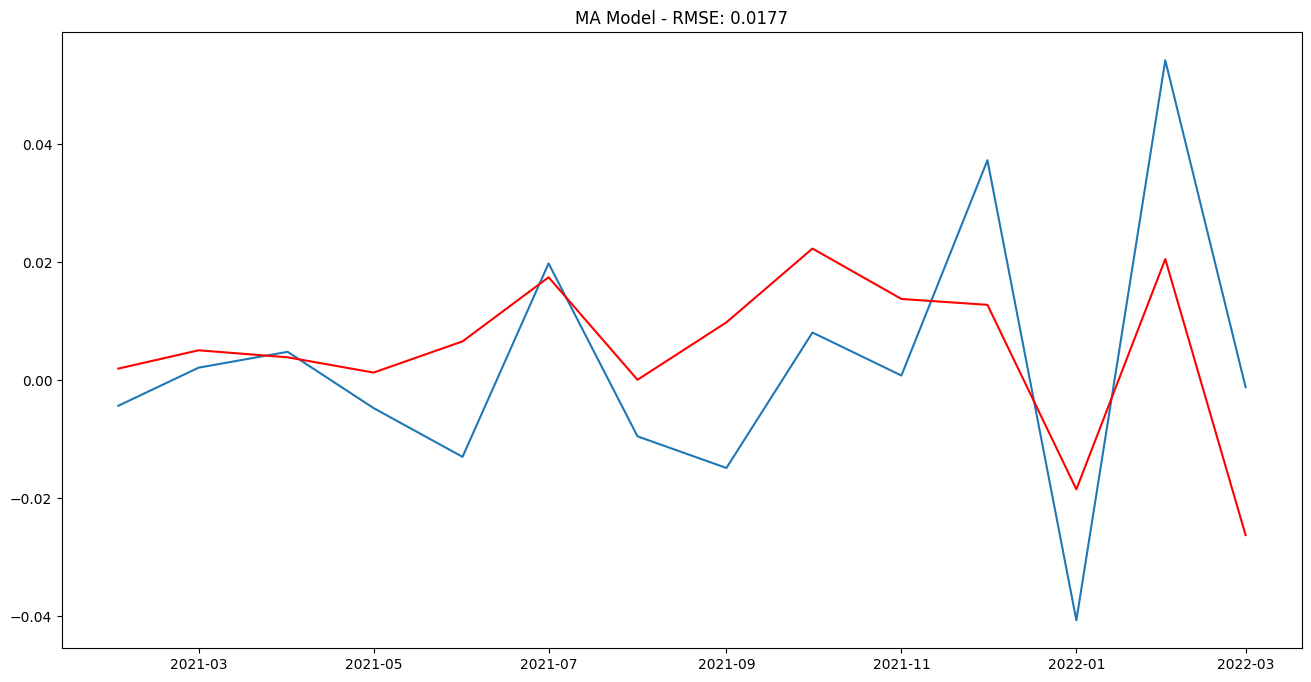

In [27]:
plt.figure(figsize = (16, 8))

# Using p=0, d = 0, q = 1
model_MA = ARIMA(df_shift, order = (0, 0, 1))

results_MA = model_MA.fit()

plt.plot(df_shift)

plt.plot(results_MA.fittedvalues, color = 'red')

rmse_ma = np.sqrt(mean_squared_error(results_MA.fittedvalues, df_shift['unit_price']))
plt.title('MA Model - RMSE: %.4f' % rmse_ma)

plt.show()

- **The MA model is giving a slightly higher RMSE** when compared to the AR model.

Let's check the AIC value of the model.

In [28]:
# Calculating the AIC value
results_MA.aic

np.float64(-66.18794043612978)

- **The MA model is giving a lower AIC** when compared to the AR model, implying that **the MA model fits the training data better.**

## **ARMA Model**

We will be using an **ARIMA model with p = 1 and q = 1** (as observed from the ACF and PACF plots) **and d = 0 so that it works as an ARMA model.**

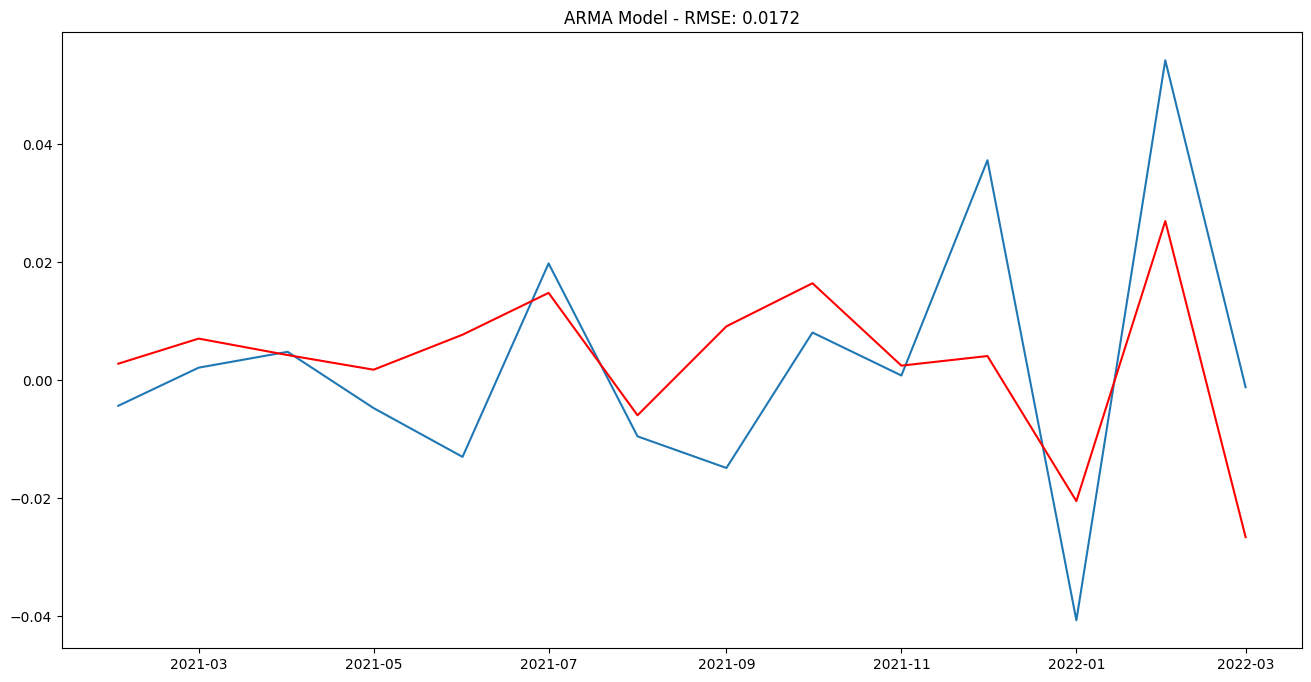

In [29]:
plt.figure(figsize = (16, 8))

# Using p = 1, d = 0, q = 1
model_ARMA = ARIMA(df_shift, order = (1, 0, 1))

results_ARMA = model_ARMA.fit()

plt.plot(df_shift)

plt.plot(results_ARMA.fittedvalues, color = 'red')

rmse_arma = np.sqrt(mean_squared_error(results_ARMA.fittedvalues, df_shift['unit_price']))
plt.title('ARMA Model - RMSE: %.4f' % rmse_arma)

plt.show()

- **The ARMA model is giving a lower RMSE in comparison to AR and MA models.**

**Let's check the AIC value** of the model.

In [30]:
# Calculating the AIC value
results_ARMA.aic

np.float64(-65.64901433957034)

- **The AIC value of the ARMA model is less than the AR model but greater than the MA model.**

**Let us try using the ARIMA model.**

## **ARIMA Model**

We will be using an **ARIMA model with p = 1, d = 1, & q = 1**.

Since we are using d = 1 in the ARIMA model, it will result in double differencing of the df_log series. So, we need double shifted series in order to calculate the RMSE of the model.

In [31]:
# Getting double differenced series
df_shift2 = df_log - df_log.shift(periods = 2)

df_shift2.dropna(inplace = True)

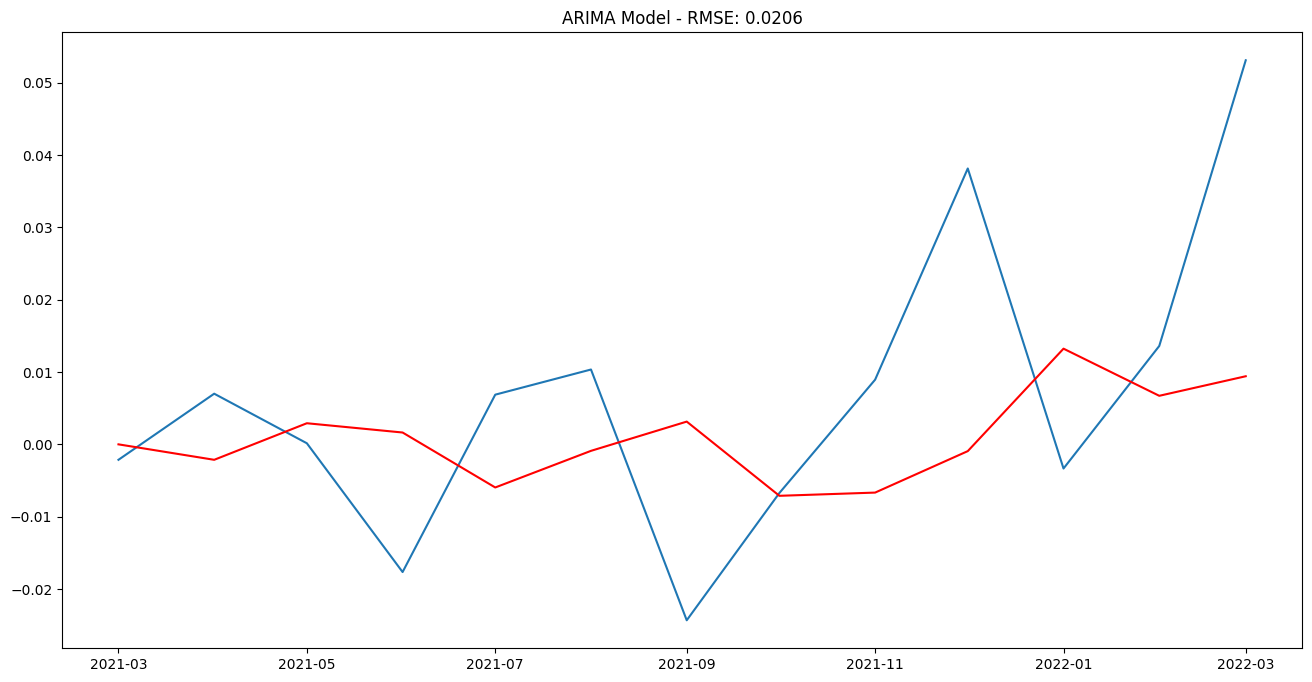

In [32]:
from statsmodels.tsa.arima.model import ARIMA

plt.figure(figsize=(16, 8))

# Using p = 1, d = 1, q = 1
model_ARIMA = ARIMA(df_shift2['unit_price'], order=(1, 1, 1))
results_ARIMA = model_ARIMA.fit()

plt.plot(df_shift2)
plt.plot(results_ARIMA.fittedvalues, color='red')

plt.title('ARIMA Model - RMSE: %.4f' % np.sqrt(mean_squared_error(results_ARIMA.fittedvalues, df_shift2['unit_price'])))

plt.show()

- **The ARIMA model is giving a higher RMSE than other models.**

**Let's check the AIC value** of the model.

In [33]:
# Calculating the AIC
results_ARIMA.aic

np.float64(-51.75063924826132)

- **The AIC value of the ARIMA model is higher as compared to previous models.**

The ARMA model is giving the least RMSE among the models.

**We choose to make predictions using ARMA model.**

In [34]:
# Printing the fitted values
predictions = pd.Series(results_ARMA.fittedvalues)

predictions

date
2021-02-01    0.002836
2021-03-01    0.007088
2021-04-01    0.004299
2021-05-01    0.001813
2021-06-01    0.007748
2021-07-01    0.014838
2021-08-01   -0.005913
2021-09-01    0.009166
2021-10-01    0.016469
2021-11-01    0.002503
2021-12-01    0.004132
2022-01-01   -0.020467
2022-02-01    0.027013
2022-03-01   -0.026561
Freq: MS, dtype: float64

## **Inverse Transformation**

Now that we have fitted values using the ARIMA model, **we will use the inverse transformation to get back the original values.**

In [35]:
# First step - doing cumulative sum
predictions_cumsum = predictions.cumsum()

predictions_cumsum

date
2021-02-01    0.002836
2021-03-01    0.009924
2021-04-01    0.014223
2021-05-01    0.016036
2021-06-01    0.023783
2021-07-01    0.038621
2021-08-01    0.032708
2021-09-01    0.041875
2021-10-01    0.058343
2021-11-01    0.060847
2021-12-01    0.064978
2022-01-01    0.044512
2022-02-01    0.071525
2022-03-01    0.044964
Freq: MS, dtype: float64

In [36]:
# Second step - adding the first value of the log series to the cumulative sum values
predictions_log = pd.Series(df_log['unit_price'].iloc[0], index = df_log.index)

predictions_log = predictions_log.add(predictions_cumsum, fill_value = 0)

predictions_log

date
2021-01-01    0.252256
2021-02-01    0.255092
2021-03-01    0.262180
2021-04-01    0.266479
2021-05-01    0.268291
2021-06-01    0.276039
2021-07-01    0.290877
2021-08-01    0.284964
2021-09-01    0.294131
2021-10-01    0.310599
2021-11-01    0.313103
2021-12-01    0.317234
2022-01-01    0.296768
2022-02-01    0.323781
2022-03-01    0.297220
Freq: MS, dtype: float64

In [37]:
# Third step - applying exponential transformation
predictions_ARMA = np.exp(predictions_log)

predictions_ARMA

date
2021-01-01    1.286925
2021-02-01    1.290581
2021-03-01    1.299761
2021-04-01    1.305360
2021-05-01    1.307728
2021-06-01    1.317900
2021-07-01    1.337600
2021-08-01    1.329715
2021-09-01    1.341959
2021-10-01    1.364243
2021-11-01    1.367662
2021-12-01    1.373324
2022-01-01    1.345503
2022-02-01    1.382344
2022-03-01    1.346111
Freq: MS, dtype: float64

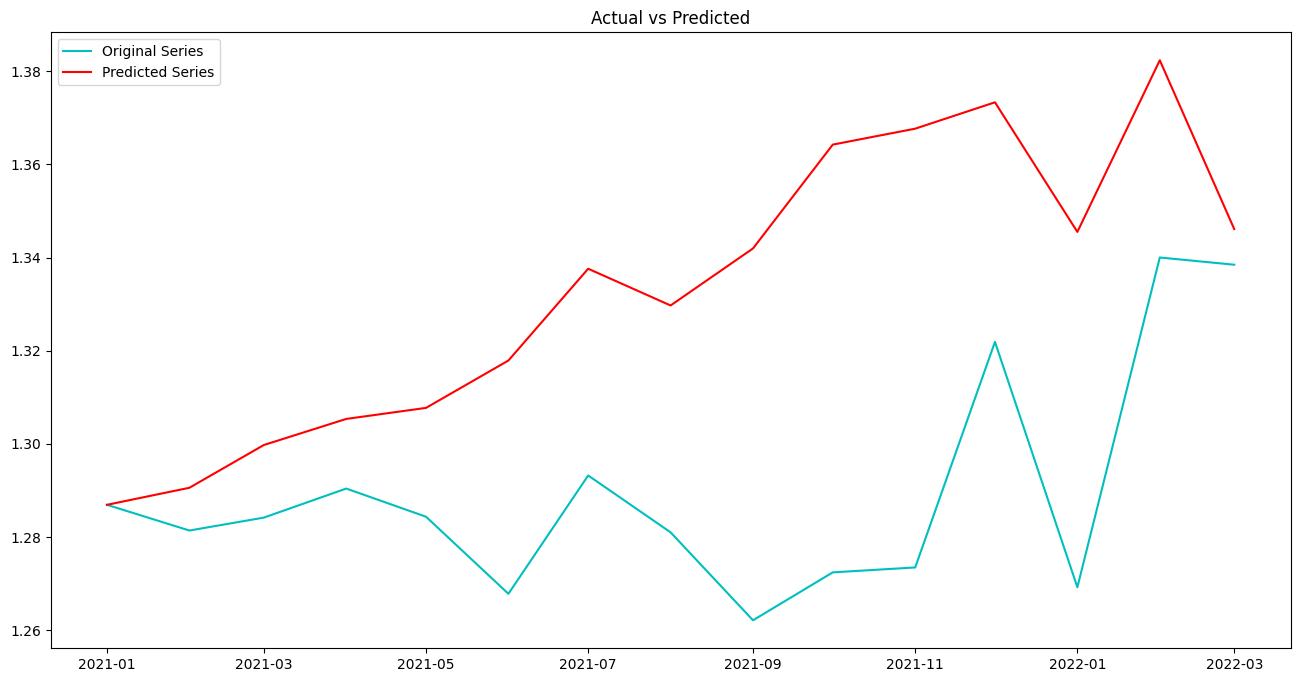

In [38]:
# Plotting the original vs predicted series
plt.figure(figsize = (16, 8))

plt.plot(df_train, color = 'c', label = 'Original Series')

plt.plot(predictions_ARMA, color = 'r', label = 'Predicted Series')

plt.title('Actual vs Predicted')

plt.legend()

plt.show()

**Observations:**
- We can see that our prediction **has almost the same symmetrical wave as the original**.
- Next : **forecasting the closing sales for the next 6 months.**

## **Forecasting the values for the next 6 months and comparing it with the test data**

**To forecast the values for the next 6 months using the ARMA model, steps:**
1. Forecast the log-transformed fitted values for the next 6 months.
2. Make a list of these 6 months' forecasted values.
3. Convert that list into a series so that we can work with pandas functions.
4. Make a dataframe where we have the dates starting from 2022-04-01 to 2022-10-01 as the index and the respective forecasted values.
5. Apply the inverse transformation and get the real forecasted values.

In [39]:
# Forecasting the values for next 6 months where 'steps' represent the number of months
forecasted_ARMA = results_ARMA.forecast(steps = 6)

forecasted_ARMA

2022-04-01   -0.001509
2022-05-01    0.004766
2022-06-01    0.001979
2022-07-01    0.003217
2022-08-01    0.002667
2022-09-01    0.002911
Freq: MS, Name: predicted_mean, dtype: float64

In [40]:
# Creating a series of cumulative sum
forecasted_cumsum = forecasted_ARMA.cumsum()

forecasted_cumsum

2022-04-01   -0.001509
2022-05-01    0.003257
2022-06-01    0.005236
2022-07-01    0.008453
2022-08-01    0.011120
2022-09-01    0.014031
Freq: MS, Name: predicted_mean, dtype: float64

In [41]:
# Making a new dataframe to get the the indices from 2022-04-01 to 2022-10-01
index = pd.date_range('2022-04-01', '2022-10-01', freq = '1M')

df1 = pd.DataFrame()

df1['cumsum'] = forecasted_cumsum

df1.index = index

df1

,cumsum
2022-04-30,-0.001509
2022-05-31,0.003257
2022-06-30,0.005236
2022-07-31,0.008453
2022-08-31,0.011120
2022-09-30,0.014031


In [42]:
# Adding the last value of the log of the training data (use last available date in df_log)
last_log_value = df_log['unit_price'].iloc[-1]
df1['Forecasted'] = df1['cumsum'] + last_log_value

df1

,cumsum,Forecasted
2022-04-30,-0.001509,0.290013
2022-05-31,0.003257,0.294779
2022-06-30,0.005236,0.296758
2022-07-31,0.008453,0.299975
2022-08-31,0.011120,0.302642
2022-09-30,0.014031,0.305553


In [43]:
# Applying the exponential transformation to the forecasted log values
forecasted_ARMA = np.exp(df1['Forecasted'])

forecasted_ARMA

2022-04-30    1.336444
2022-05-31    1.342829
2022-06-30    1.345490
2022-07-31    1.349825
2022-08-31    1.353430
2022-09-30    1.357376
Freq: ME, Name: Forecasted, dtype: float64

Visualization of the original data with the predicted values on the training data and the forecasted values.

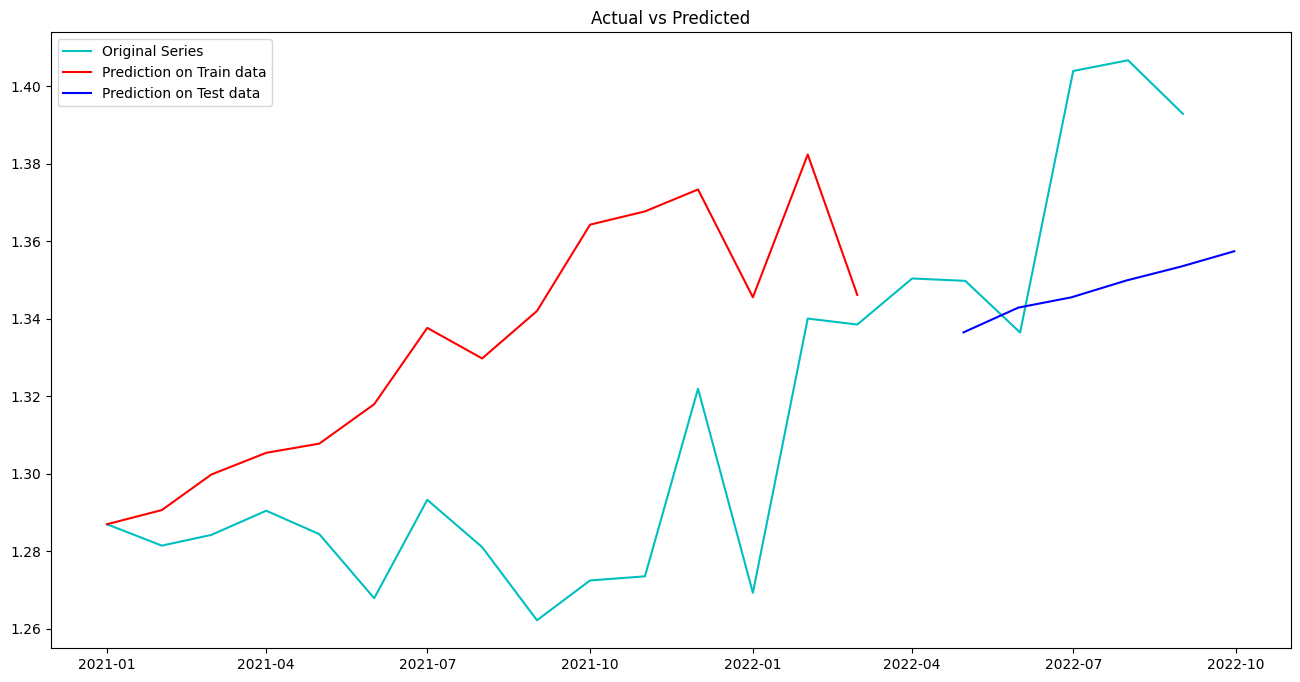

In [44]:
# Plotting the original vs predicted series
plt.figure(figsize = (16, 8))

plt.plot(df_bread_by_month, color = 'c', label = 'Original Series')

plt.plot(predictions_ARMA, color = 'r', label = 'Prediction on Train data')

plt.plot(forecasted_ARMA, label = 'Prediction on Test data', color = 'b')

plt.title('Actual vs Predicted')

plt.legend()

plt.show()

**Observations:**

 - **On the training data, the predicted values are relatively close to the actual values**, with the exception of the spike in December 2022.

- **The model performs poorly on the test data**, as the blue line (predicted values) deviates significantly from the actual values (cyan blue). The model fails to capture the volatile fluctuations in prices over the last 6 months.

Next, we’ll calculate the RMSE for both the transformed predictions and the original values on the training and testing datasets to assess whether the model generalizes well.

In [45]:
from sklearn.metrics import mean_squared_error

error = np.sqrt(mean_squared_error(predictions_ARMA, df_train))

error

np.float64(0.052869232764994716)

In [46]:
from sklearn.metrics import mean_squared_error

error = np.sqrt(mean_squared_error(forecasted_ARMA, df_test))

error

np.float64(0.03497421505062903)

## **Conclusion**

- **The RMSE is lower on the training data compared to the testing data**, indicating that the predictions on the training set are closer to the actual values than those on the test set.

This discrepancy could be due to the **high volatility in bread sales over the last 6 months**. As shown in the plot above, the prices exhibit a steeper trend and more variability in the final months. Our model has not captured these recent changes, which is why the predictions for the test data deviate from the actual values.

One key feature of the bread sales is its fluctuations during this recent period. **Our model might not be complex enough to capture these sudden spikes and dips.** We could explore more sophisticated time series models like SARIMA or SARIMAX, which take into account additional factors like trend, seasonality, and external influences, to see if we can improve the model’s ability to generalize.